In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("./dataset/ressonanciaMLP.csv")
test = pd.read_csv("./dataset/ressonanciaMLPTest.csv")

In [4]:
base = pd.concat([train, test])

In [11]:
base

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
15,0.8882,0.3077,0.8931,0.8093
16,0.2225,0.9182,0.7820,0.7581
17,0.1957,0.8423,0.3085,0.5826
18,0.9991,0.5914,0.3933,0.7938


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar e pré-processar os dados
class DataLoader:
    @staticmethod
    def load_data(path):
        data = pd.read_csv(path)
        return data

class DataPreprocessor:
    def __init__(self, df):
        self.df = df

    def split_features_and_target(self, target_column='d'):
        X = self.df[['x1', 'x2', 'x3']]
        y = self.df[target_column]
        return X, y

    def normalize_features(self, X):
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        return X, scaler

class MLPTrainer:
    def __init__(self, activation, hidden_layer_sizes, learning_rate_init=0.01, max_iter=1000, random_state=42):
        self.model = MLPRegressor(
            activation=activation,
            hidden_layer_sizes=hidden_layer_sizes,
            learning_rate_init=learning_rate_init,
            max_iter=max_iter,
            random_state=random_state
        )

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        return self.model

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        loss = mean_squared_error(y_test, y_pred)
        return loss, self.model.n_iter_




In [13]:

# Carregar os dados
data = base.copy()



In [14]:
data

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
15,0.8882,0.3077,0.8931,0.8093
16,0.2225,0.9182,0.7820,0.7581
17,0.1957,0.8423,0.3085,0.5826
18,0.9991,0.5914,0.3933,0.7938


In [22]:
# Pré-processar os dados
preprocessor = DataPreprocessor(data)
X, y = preprocessor.split_features_and_target()
#X, scaler = preprocessor.normalize_features(X)

In [27]:
from prettytable import PrettyTable


In [33]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Configurações para os treinamentos
activations = ['tanh', 'relu', 'logistic']
neurons = [5, 10, 15]
results = []
# Executar os treinamentos
for activation in activations:
    for neuron in neurons:
        trainer = MLPTrainer(activation=activation, hidden_layer_sizes=(neuron,))
        model = trainer.train(X_train, y_train)
        loss, epochs = trainer.evaluate(X_test, y_test)
        results.append((activation, neuron, loss, epochs, model))

    # Classificar os resultados
results.sort(key=lambda x: x[2])

table = PrettyTable()
table.field_names = ["Treinamento", "Neurônios", "Ativação", "Perda Final", "Número de Épocas", "Model"]

for i, (activation, neuron, loss, epochs, model) in enumerate(results, start=1):
        table.add_row([f"{i}º (T{i})", neuron, activation, f"{loss:.4f}", epochs, model])

print(table)



+-------------+-----------+----------+-------------+------------------+--------------------------------------------------------------------------------+
| Treinamento | Neurônios | Ativação | Perda Final | Número de Épocas |                                     Model                                      |
+-------------+-----------+----------+-------------+------------------+--------------------------------------------------------------------------------+
|   1º (T1)   |     15    |   relu   |    0.0015   |        53        | MLPRegressor(hidden_layer_sizes=(15,), learning_rate_init=0.01, max_iter=1000, |
|             |           |          |             |                  |                                      random_state=42)                          |
|   2º (T2)   |     10    |   relu   |    0.0015   |        65        | MLPRegressor(hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=1000, |
|             |           |          |             |                  |           

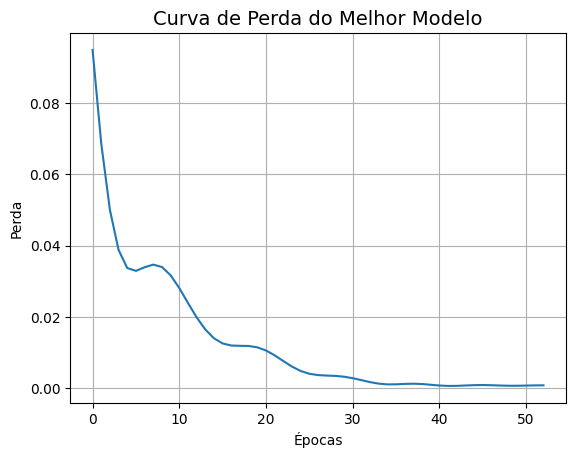

In [34]:
import matplotlib.pyplot as plt

best_model = results[0][4]
plt.plot(best_model.loss_curve_)
plt.title("Curva de Perda do Melhor Modelo", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.show()


In [31]:
results

[('relu', 15, 0.0015170114658609683, 53),
 ('relu', 10, 0.0015295566920569925, 65),
 ('tanh', 5, 0.001735316666974427, 127),
 ('tanh', 15, 0.003109737315709396, 28),
 ('logistic', 15, 0.01680438358616946, 18),
 ('logistic', 10, 0.021775989215754365, 20),
 ('logistic', 5, 0.025114968531775538, 35),
 ('relu', 5, 0.03007950069396447, 79),
 ('tanh', 10, 0.05913046287692675, 23)]

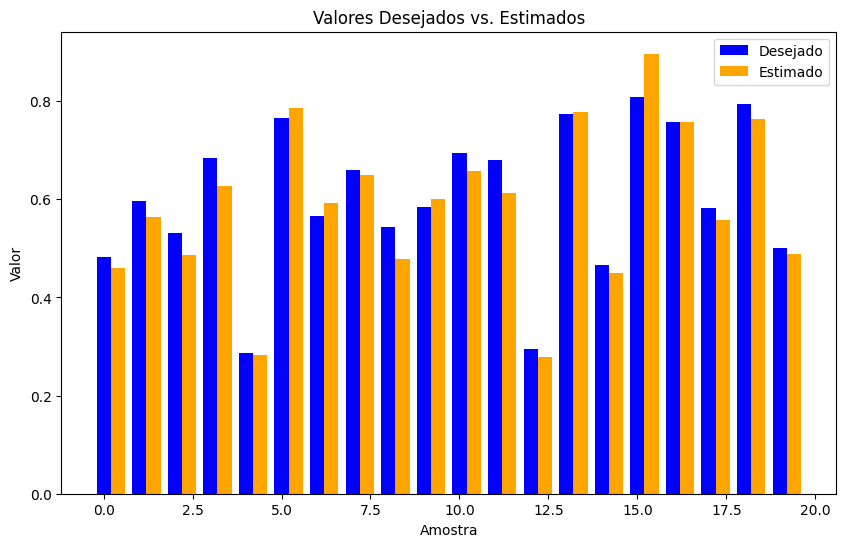

Mean Absolute Error (MAE): 0.02990738521857437
Mean Squared Error (MSE): 0.001412530598836247
Root Mean Squared Error (RMSE): 0.03758364802458972
Mean Absolute Percentage Error (MAPE): 4.948898357013116


In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Dados de teste fornecidos
test_data = {
    'x1': [0.0611, 0.5102, 0.0004, 0.9430, 0.1399, 0.6423, 0.6492, 0.1818, 0.7382, 0.3879,
           0.1903, 0.8401, 0.0029, 0.7088, 0.1283, 0.8882, 0.2225, 0.1957, 0.9991, 0.2299],
    'x2': [0.2860, 0.7464, 0.6916, 0.4476, 0.1610, 0.3229, 0.0007, 0.5078, 0.2647, 0.1307,
           0.6523, 0.4490, 0.3264, 0.9342, 0.1882, 0.3077, 0.9182, 0.8423, 0.5914, 0.1524],
    'x3': [0.7464, 0.0860, 0.5006, 0.2648, 0.2477, 0.8567, 0.6422, 0.9046, 0.1916, 0.8656,
           0.7820, 0.2719, 0.2476, 0.2763, 0.7253, 0.8931, 0.7820, 0.3085, 0.3933, 0.7353],
    'd': [0.4831, 0.5965, 0.5318, 0.6843, 0.2872, 0.7663, 0.5666, 0.6601, 0.5427, 0.5836,
          0.6950, 0.6790, 0.2956, 0.7742, 0.4662, 0.8093, 0.7581, 0.5826, 0.7938, 0.5012]
}

test = pd.DataFrame(test_data)
# Realizar a predição com o modelo treinado
y_pred = best_model.predict(test[['x1', 'x2', 'x3']])

# Calcular as métricas de avaliação
mae = mean_absolute_error(test_data['d'], y_pred)
mse = mean_squared_error(test_data['d'], y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data['d'] - y_pred) / test_data['d'])) * 100

# Plotar um gráfico de barras comparando os valores estimados e desejados
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(test_data['d'])), test_data['d'], width=0.4, label='Desejado', color='blue', align='center')
plt.bar(np.arange(len(y_pred)) + 0.4, y_pred, width=0.4, label='Estimado', color='orange', align='center')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Desejados vs. Estimados')
plt.legend()
plt.show()

# Exibir as métricas de avaliação
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)
